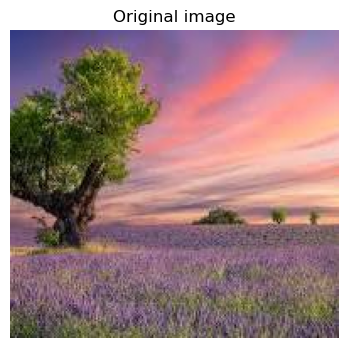

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("asd.jpg")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,4))
plt.imshow(img_rgb)
plt.title("Original image")
plt.axis("off")
plt.show()

Could not read /asd.jpg
Processing asd2.jpg ...


[ WARN:0@28.205] global loadsave.cpp:278 findDecoder imread_('/asd.jpg'): can't open/read file: check file path/integrity


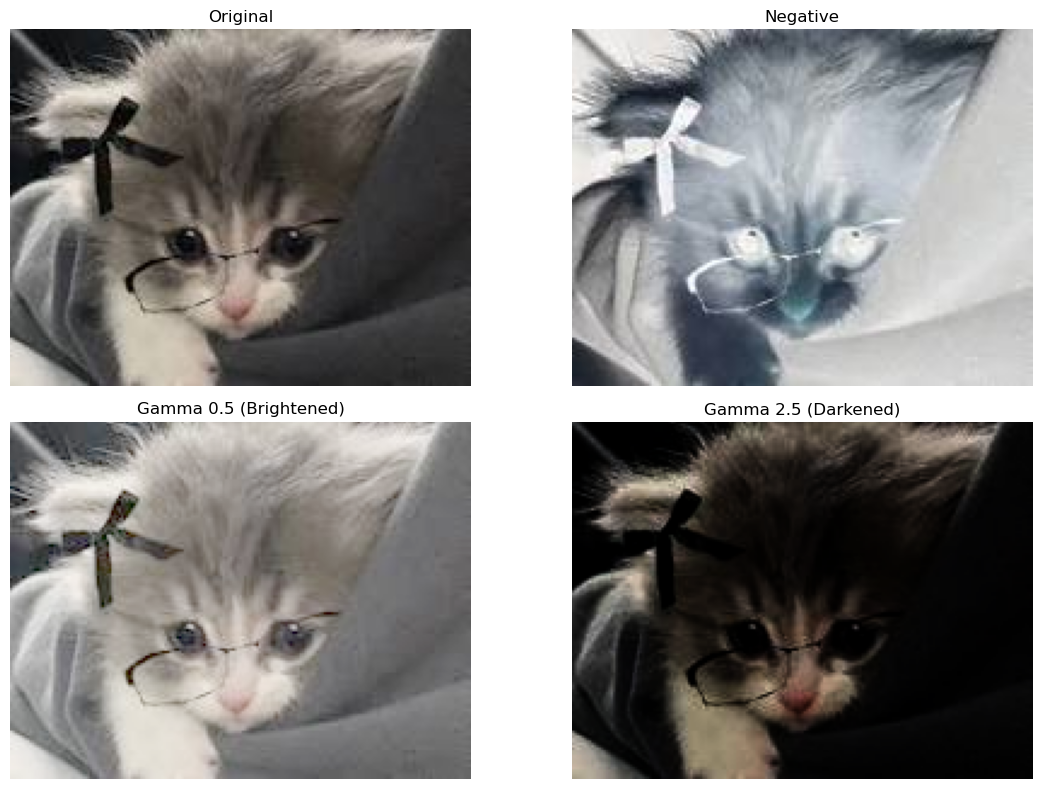

All images processed successfully.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def gamma_correction(image, gamma, c=1):
    image_norm = image.astype('float32') / 255.0
    corrected = c * (image_norm ** gamma)
    corrected = np.clip(corrected * 255, 0, 255)
    return corrected.astype(np.uint8)


def image_negative(image):
    return 255 - image

image_files = ["/asd.jpg", "asd2.jpg"]

for file in image_files:
    
    image = cv2.imread(file)
    
    if image is None:
        print(f"Could not read {file}")
        continue
    
    print(f"Processing {file} ...")

    negative = image_negative(image)

    gamma_bright = gamma_correction(image, gamma=0.5)  
    gamma_dark = gamma_correction(image, gamma=2.5)    
    

    plt.figure(figsize=(12,8))
    
    plt.subplot(2,2,1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.axis("off")
    
    plt.subplot(2,2,2)
    plt.imshow(cv2.cvtColor(negative, cv2.COLOR_BGR2RGB))
    plt.title("Negative")
    plt.axis("off")
    
    plt.subplot(2,2,3)
    plt.imshow(cv2.cvtColor(gamma_bright, cv2.COLOR_BGR2RGB))
    plt.title("Gamma 0.5 (Brightened)")
    plt.axis("off")
    
    plt.subplot(2,2,4)
    plt.imshow(cv2.cvtColor(gamma_dark, cv2.COLOR_BGR2RGB))
    plt.title("Gamma 2.5 (Darkened)")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()
    
    cv2.imwrite("negative_" + file, negative)
    cv2.imwrite("gamma05_" + file, gamma_bright)
    cv2.imwrite("gamma25_" + file, gamma_dark)

print("All images processed successfully.") 

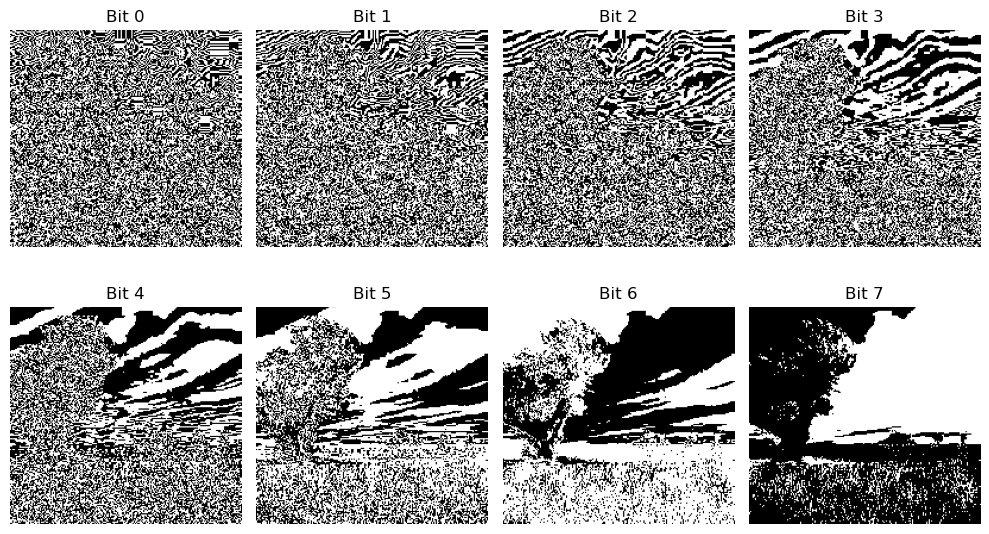

In [1]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("asd.jpg")

if image is None:
    print("Image not found")
    exit()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,6))

for k in range(8):
    bit = ((gray >> k) & 1) * 255
    
    plt.subplot(2,4,k+1)
    plt.imshow(bit, cmap='gray')
    plt.title(f"Bit {k}")
    plt.axis("off")

plt.tight_layout()
plt.show()